**Goal:** Predict "log-error"

**Hypothesis:**

In [336]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#wrangling
import pandas as pd
import numpy as np

#explore
import scipy.stats as stats

#visuals
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


#default pandas decimal display formatting
pd.options.display.float_format='{:20,.2f}'.format

import env
import acquire
import prepare
# import summarize

### Acquire & Summarize


Acquired zillow data using acquire.py (sequel query in this file)

In [385]:
df = acquire.get_zillow_data()
df.head()

,county,tax_rate,id,parcelid,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,basementsqft,bathroomcnt,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,typeconstructiontypeid,typeconstructiondesc,censustractandblock,transactiondate,logerror,transactions
0,Ventura,0.01,1387261,17052889,nan,None,nan,None,nan,1.00,...,"376,000.00","5,672.48",None,nan,nan,None,"61,110,010,023,006.00",2017-01-01,0.06,1
1,Ventura,0.01,43675,17110996,nan,None,nan,None,nan,2.50,...,"99,028.00","2,204.84",None,nan,nan,None,"61,110,050,041,163.00",2017-01-02,0.01,1
2,Ventura,0.01,2490820,17134185,nan,None,nan,None,nan,2.00,...,"273,509.00","4,557.52",None,nan,nan,None,"61,110,055,042,000.00",2017-01-03,0.06,1
3,Ventura,0.02,269618,17292247,nan,None,nan,None,nan,2.00,...,"24,808.00","1,450.06",None,nan,nan,None,"61,110,059,063,018.00",2017-01-03,-0.42,1
4,Ventura,0.01,74982,17141654,nan,None,nan,None,nan,3.00,...,"126,138.00","4,139.18",None,nan,nan,None,"61,110,053,061,004.00",2017-01-03,-0.02,1


In [386]:
# df.transactiondate = pd.to_datetime(df.transactiondate, format='%Y-%m-%d')
# df = df.sort_values("transactiondate").drop_duplicates('parcelid',keep='last') 

2. Summary of zillow data (summary stats, info, dtypes, shape, distributions)

In [387]:
df.shape

(52169, 72)

In [288]:
# df.info()

In [289]:
# df.describe()

In [290]:
# df.dtypes

In [291]:
# pd.DataFrame(df.columns)

In [388]:
df = prepare.handle_missing_values(df)

In [389]:
df.isnull().sum()

county                              0
tax_rate                            5
id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18541
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
state                               0
fullbathcnt                        16
heatingorsystemtypeid           18345
heatingorsystemdesc             18345
latitude                            0
longitude                           0
lotsizesquarefeet                 354
propertycountylandusecode           0
propertylandusetypeid               0
propertylandusedesc                 0
propertyzoningdesc              18479
rawcensustractandblock              0
regionidcity                     1028
regionidcounty                      0
regionidzip                        23
roomcnt     

In [390]:
cols_to_remove = ["unitcnt", "propertyzoningdesc", "heatingorsystemdesc", 
                  "heatingorsystemtypeid", "buildingqualitytypeid", "assessmentyear",
                  "calculatedbathnbr", "finishedsquarefeet12", "propertylandusedesc", 
                  "propertylandusetypeid", "rawcensustractandblock" , "regionidcity",
                  "state", "id", "fullbathcnt", "roomcnt", 'parcelid', 'taxvaluedollarcnt', 
                  'structuretaxvaluedollarcnt', 'taxamount', 'transactiondate','transactions', 
                  'calculatedfinishedsquarefeet', 'landtaxvaluedollarcnt', 'county', 'propertycountylandusecode']

In [391]:
df['price_per_sq_ft'] = df.taxvaluedollarcnt/df.calculatedfinishedsquarefeet

In [392]:
df = prepare.remove_columns(df, cols_to_remove)

In [393]:
df.dropna(inplace=True)

In [394]:
df.isnull().sum()

tax_rate               0
bathroomcnt            0
bedroomcnt             0
fips                   0
latitude               0
longitude              0
lotsizesquarefeet      0
regionidcounty         0
regionidzip            0
yearbuilt              0
censustractandblock    0
logerror               0
price_per_sq_ft        0
dtype: int64

In [395]:
df.shape

(51715, 13)

In [396]:
df.dtypes

tax_rate               float64
bathroomcnt            float64
bedroomcnt             float64
fips                   float64
latitude               float64
longitude              float64
lotsizesquarefeet      float64
regionidcounty         float64
regionidzip            float64
yearbuilt              float64
censustractandblock    float64
logerror               float64
price_per_sq_ft        float64
dtype: object

In [397]:
cols = ["censustractandblock",  "fips", "regionidcounty", "regionidzip", "yearbuilt"]

In [398]:
df = prepare.numeric_to_category(df, cols)

In [399]:
df.dtypes

tax_rate                float64
bathroomcnt             float64
bedroomcnt              float64
fips                   category
latitude                float64
longitude               float64
lotsizesquarefeet       float64
regionidcounty         category
regionidzip            category
yearbuilt              category
censustractandblock    category
logerror                float64
price_per_sq_ft         float64
dtype: object

In [400]:
df.latitude = df.latitude / 1_000_000 
df.longitude = df.longitude / 1_000_000 

In [401]:
from sklearn.cluster import KMeans

X = df

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

X['cluster'] = pd.Series(kmeans.predict(X)).astype(str)

In [402]:
X = X.dropna()

In [403]:
X.head()

,tax_rate,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,regionidcounty,regionidzip,yearbuilt,censustractandblock,logerror,price_per_sq_ft,cluster
0,0.01,1.00,2.00,"6,111.00",34.45,-119.28,"12,647.00","2,061.00","97,099.00","1,967.00","61,110,010,023,006.00",0.06,316.72,2
1,0.01,2.50,3.00,"6,111.00",34.24,-119.17,"3,445.00","2,061.00","97,107.00","2,004.00","61,110,050,041,163.00",0.01,144.46,2
2,0.01,2.00,4.00,"6,111.00",34.23,-119.04,"7,300.00","2,061.00","97,089.00","1,969.00","61,110,055,042,000.00",0.06,302.10,2
3,0.02,2.00,3.00,"6,111.00",34.14,-118.88,"11,200.00","2,061.00","96,384.00","1,957.00","61,110,059,063,018.00",-0.42,61.08,2
4,0.01,3.00,4.00,"6,111.00",34.23,-118.98,"8,644.00","2,061.00","97,091.00","1,978.00","61,110,053,061,004.00",-0.02,165.52,2


In [404]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(X, test_size=.30, random_state=123)

In [405]:
train.shape

(35883, 14)

In [406]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
tax_rate,"35,883.00",0.01,0.01,0.00,0.01,0.01,0.01,0.82
bathroomcnt,"35,883.00",2.30,1.01,1.00,2.00,2.00,3.00,11.00
bedroomcnt,"35,883.00",3.31,0.93,1.00,3.00,3.00,4.00,11.00
latitude,"35,883.00",34.02,0.27,33.34,33.82,34.02,34.19,34.81
longitude,"35,883.00",-118.19,0.36,-119.48,-118.40,-118.15,-117.93,-117.56
lotsizesquarefeet,"35,883.00","11,277.80","89,003.12",236.00,"5,578.50","6,814.00","8,736.00","6,971,010.00"
logerror,"35,883.00",0.02,0.17,-4.66,-0.02,0.01,0.04,5.26
price_per_sq_ft,"35,883.00",258.52,222.08,0.30,123.06,226.19,331.51,"7,382.15"


In [407]:
x_train = train.drop(columns="logerror")

y_train = train[["logerror"]]

x_test = test.drop(columns="logerror")

y_test = test[["logerror"]]

In [138]:
# df_nums_train = train.select_dtypes(exclude="category")

# df_nums_test = test.select_dtypes(exclude="category")

# df_nums_train.shape

In [139]:
# x_df_nums_train = df_nums_train.drop(columns="logerror")

# y_df_nums_train = df_nums_train[["logerror"]]

# x_df_nums_test = df_nums_test.drop(columns="logerror")

# y_df_nums_test = df_nums_test[["logerror"]]

# x_df_nums_train.head().T

In [140]:
# y_df_nums_train.head().T

### Model df - Random Forest

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [409]:
x_train.head()

,tax_rate,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,regionidcounty,regionidzip,yearbuilt,censustractandblock,price_per_sq_ft,cluster
18640,0.01,3.00,3.00,"6,037.00",34.02,-118.26,"4,001.00","3,101.00","95,992.00","1,930.00","60,372,741,001,008.00",271.88,4
26794,0.01,8.00,6.00,"6,037.00",34.12,-118.43,"154,787.00","3,101.00","96,086.00","2,010.00","60,372,611,022,007.00",430.12,0
5780,0.01,2.00,4.00,"6,037.00",33.98,-117.94,"5,729.00","3,101.00","96,489.00","1,978.00","60,374,086,282,009.00",230.77,0
9445,0.01,4.50,4.00,"6,059.00",33.51,-117.64,"43,560.00","1,286.00","96,985.00","1,991.00","60,590,320,611,016.00",450.61,3
4619,0.01,2.00,2.00,"6,037.00",33.95,-118.23,"5,309.00","3,101.00","96,125.00","1,941.00","60,375,356,061,002.00",187.25,3


In [410]:
x_train.dtypes

tax_rate                float64
bathroomcnt             float64
bedroomcnt              float64
fips                   category
latitude                float64
longitude               float64
lotsizesquarefeet       float64
regionidcounty         category
regionidzip            category
yearbuilt              category
censustractandblock    category
price_per_sq_ft         float64
cluster                  object
dtype: object

In [411]:
y_train.head()

,logerror
18640,0.02
26794,-0.21
5780,-0.21
9445,0.21
4619,0.00


In [412]:
rf = RandomForestRegressor()

In [413]:
type(y_train)

pandas.core.frame.DataFrame

In [414]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [415]:
from sklearn.metrics import mean_squared_error

y_pred = rf.predict(x_train)
mean_squared_error(y_train, y_pred)**1/2

0.0029016520645958797

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

- Number of rows with missing values

In [8]:
number_missing = df.isnull().sum()

- percent of total rows that have missing values

In [9]:
pct_missing = (df.isnull().sum())/df.shape[0]

In [10]:
nulls_by_column_df = pd.DataFrame({'num_rows_missing': number_missing, 'pct_rows_missing': pct_missing})

In [11]:
def nulls_by_col(df):
    number_missing = df.isnull().sum()
    pct_missing = (df.isnull().sum())/df.shape[0]
    rows_missing_df = pd.DataFrame({'num_rows_missing': number_missing, 'pct_rows_missing': pct_missing})
    return nulls_by_column_df

In [12]:
nulls_by_column_df

,num_rows_missing,pct_rows_missing
county,0,0.00
tax_rate,5,0.00
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,38564,0.74
airconditioningdesc,38564,0.74
architecturalstyletypeid,52099,1.00
architecturalstyledesc,52099,1.00
basementsqft,52122,1.00
bathroomcnt,0,0.00


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [13]:
df.fips.unique()

array([6111., 6037., 6059.])

In [14]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [15]:
num_cols_missing = df.isnull().sum(axis=1)
pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()

In [16]:
rows_missing

,num_cols_missing,pct_cols_missing,num_rows
0,23,31.944444444444443,2
1,24,33.33333333333333,12
2,25,34.72222222222222,11
3,26,36.11111111111111,30
4,27,37.5,177
5,28,38.88888888888889,389
6,29,40.27777777777778,2527
7,30,41.66666666666667,2194
8,31,43.05555555555556,5986
9,32,44.44444444444444,8880


### Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

#### Single Unit Properties (as defined by Jeff Hutchins)

Single Family Residential = 52320

Residential General = 37

Rural Residence = 0

Mobile Home = 74

Manufactured, Modular, Prefabricated Homes = 58

Inferred Single Family Residential = 0

Bungalow = 0

In [17]:
(df.propertylandusedesc == 'Single Family Residential').sum()

52169

In [18]:
df.fips.unique()

array([6111., 6037., 6059.])

In [19]:
df.shape

(52169, 72)

Get rid of most columns with nans, accept for columns like has pool.  can safely assume a nan means they dont have a pool and should be zero, not nan.

So get rid of most columns with nans in order to make an initial baseline model.

For Mall data, can bin into big spenders, middle, low, etc.  Might be a good plan

## Going to create a new column called price_per_sq_ft, use a clustering method called K-means clustering to find clusters of prices, and compare it to latitude and longitude points.

In [25]:
df.head()

,county,tax_rate,id,parcelid,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,basementsqft,bathroomcnt,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,typeconstructiontypeid,typeconstructiondesc,censustractandblock,transactiondate,logerror,transactions
0,Ventura,0.01,1387261,17052889,nan,None,nan,None,nan,1.00,...,"376,000.00","5,672.48",None,nan,nan,None,"61,110,010,023,006.00",2017-01-01,0.06,1
1,Ventura,0.01,43675,17110996,nan,None,nan,None,nan,2.50,...,"99,028.00","2,204.84",None,nan,nan,None,"61,110,050,041,163.00",2017-01-02,0.01,1
2,Ventura,0.01,2490820,17134185,nan,None,nan,None,nan,2.00,...,"273,509.00","4,557.52",None,nan,nan,None,"61,110,055,042,000.00",2017-01-03,0.06,1
3,Ventura,0.02,269618,17292247,nan,None,nan,None,nan,2.00,...,"24,808.00","1,450.06",None,nan,nan,None,"61,110,059,063,018.00",2017-01-03,-0.42,1
4,Ventura,0.01,74982,17141654,nan,None,nan,None,nan,3.00,...,"126,138.00","4,139.18",None,nan,nan,None,"61,110,053,061,004.00",2017-01-03,-0.02,1


In [26]:
df_subset = df[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'latitude', 'longitude']]
df_subset.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,latitude,longitude
0,"1,465.00","464,000.00","34,449,266.00","-119,281,531.00"
1,"1,371.00","198,054.00","34,238,229.00","-119,170,633.00"
2,"1,392.00","420,525.00","34,233,486.00","-119,038,374.00"
3,"1,270.00","77,571.00","34,139,954.00","-118,880,484.00"
4,"2,342.00","387,648.00","34,228,053.00","-118,982,963.00"


In [27]:
df_subset['price_per_sq_ft'] = df_subset.taxvaluedollarcnt/df_subset.calculatedfinishedsquarefeet

In [28]:
df_subset.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,latitude,longitude,price_per_sq_ft
0,"1,465.00","464,000.00","34,449,266.00","-119,281,531.00",316.72
1,"1,371.00","198,054.00","34,238,229.00","-119,170,633.00",144.46
2,"1,392.00","420,525.00","34,233,486.00","-119,038,374.00",302.10
3,"1,270.00","77,571.00","34,139,954.00","-118,880,484.00",61.08
4,"2,342.00","387,648.00","34,228,053.00","-118,982,963.00",165.52


In [29]:
df_subset = df_subset.dropna()

In [30]:
df_subset.isnull().sum()

calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
latitude                        0
longitude                       0
price_per_sq_ft                 0
dtype: int64

This graph shows the shape of the combination of all three counties.  The different colors represent the clusters.  The clusters are based on price per square foot, latitude, and longitude.

Used KMeans clustering on price per square foot, latitude, and longitude.  Then used the clusters as a hue to map it onto a 2D graph with longitude on the x-axis and latitude on the y-axis.  

Notes:

**Try to insert a slide for n_clusters**

**Try adding more variables**

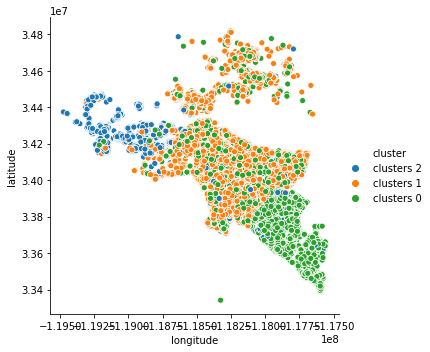

In [31]:
from sklearn.cluster import KMeans

X = df_subset[['price_per_sq_ft', 'latitude', 'longitude']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

X['cluster'] = 'clusters ' + pd.Series(kmeans.predict(X)).astype(str)

sns.relplot(data=X, hue='cluster', x='longitude', y='latitude')

In [80]:
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[1 0 1 ... 2 1 1]
4922301250808020.0
6
[[ 2.48530166e+02  3.42559641e+07 -1.18825117e+08]
 [ 2.61402179e+02  3.37881016e+07 -1.17874466e+08]
 [ 2.76027126e+02  3.41224943e+07 -1.18296331e+08]]


In [30]:
df_subset.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,latitude,longitude,price_per_sq_ft
0,"3,100.00","1,023,282.00","33,634,931.00","-117,869,207.00",330.09
1,"1,465.00","464,000.00","34,449,266.00","-119,281,531.00",316.72
2,"1,243.00","564,778.00","33,886,168.00","-117,823,170.00",454.37
3,"2,376.00","145,143.00","34,245,180.00","-118,240,722.00",61.09
4,"1,312.00","119,407.00","34,185,120.00","-118,414,640.00",91.01


In [50]:
from sklearn.cluster import KMeans

X = df_subset[['price_per_sq_ft']]

kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
print(kmeans.labels_)

print(kmeans.cluster_centers_)

[2 6 2 ... 2 6 0]
[[  73.55413274]
 [ 451.35433366]
 [ 309.38624704]
 [1111.25814028]
 [4756.07060713]
 [ 694.13142796]
 [ 192.82472464]
 [2011.44356251]]


In [52]:
X['cluster'] = 'clusters ' + pd.Series(kmeans.predict(X)).astype(str)

In [53]:
X['latitude'] = df_subset['latitude']

In [54]:
X['longitude'] = df_subset['longitude']

This graph shows the shape of the combination of all three counties.  The different colors represent the clusters.  The clusters are based on price per square foot.

Used KMeans clustering on price per square foot.  Then used the clusters as a hue to map it onto a 2D graph with longitude on the x-axis and latitude on the y-axis.  

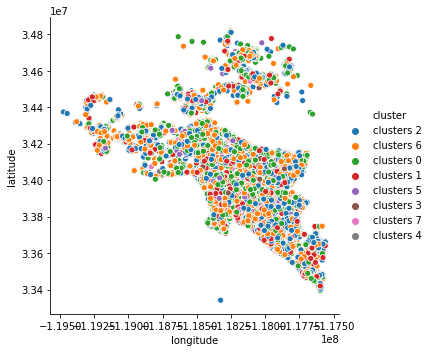

In [55]:
sns.relplot(data=X, hue='cluster', x='longitude', y='latitude')

In [40]:
df[['latitude', 'longitude']].head()

,latitude,longitude
0,"34,449,266.00","-119,281,531.00"
1,"34,238,229.00","-119,170,633.00"
2,"34,233,486.00","-119,038,374.00"
3,"34,139,954.00","-118,880,484.00"
4,"34,228,053.00","-118,982,963.00"


In [62]:
# df['latitude'].value_counts()

In [61]:
# df['longitude'].value_counts()
# pd.DataFrame(pd.cut(df['longitude'], bins=[-120_000_000, -119_000_000, -118_000_000, -117_000_000, -116_000_000]))

Also try lot size minus sq ft of house

In [65]:
df.head()

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc,airconditioningdesc,buildingclassdesc,heatingorsystemdesc
0,nan,3.50,4.00,3.50,nan,"3,100.00","3,100.00",nan,nan,nan,...,nan,"60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential,None,None,None,None,None
1,nan,1.00,2.00,1.00,"1,465.00","1,465.00","1,465.00",nan,nan,"1,465.00",...,nan,"61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential,None,None,None,None,None
2,nan,2.00,3.00,2.00,nan,"1,243.00","1,243.00",nan,nan,nan,...,nan,"60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential,None,None,None,None,None
3,nan,3.00,4.00,3.00,nan,"2,376.00","2,376.00",nan,nan,nan,...,nan,"60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential,None,None,None,None,Central
4,nan,3.00,3.00,3.00,nan,"1,312.00","1,312.00",nan,nan,nan,...,nan,"60,371,236,012,000.00",0.01,2017-01-01,Condominium,None,None,Central,None,Central


**Creating a new feature using the lot size square footage minus the square footage of the house**

In [57]:
df['yard_square_footage'] = (df['lotsizesquarefeet'] - df['calculatedfinishedsquarefeet'])

In [58]:
df.head()

,county,tax_rate,id,parcelid,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,basementsqft,bathroomcnt,...,taxamount,taxdelinquencyflag,taxdelinquencyyear,typeconstructiontypeid,typeconstructiondesc,censustractandblock,transactiondate,logerror,transactions,yard_square_footage
0,Ventura,0.01,1387261,17052889,nan,None,nan,None,nan,1.00,...,"5,672.48",None,nan,nan,None,"61,110,010,023,006.00",2017-01-01,0.06,1,"11,182.00"
1,Ventura,0.01,43675,17110996,nan,None,nan,None,nan,2.50,...,"2,204.84",None,nan,nan,None,"61,110,050,041,163.00",2017-01-02,0.01,1,"2,074.00"
2,Ventura,0.01,2490820,17134185,nan,None,nan,None,nan,2.00,...,"4,557.52",None,nan,nan,None,"61,110,055,042,000.00",2017-01-03,0.06,1,"5,908.00"
3,Ventura,0.02,269618,17292247,nan,None,nan,None,nan,2.00,...,"1,450.06",None,nan,nan,None,"61,110,059,063,018.00",2017-01-03,-0.42,1,"9,930.00"
4,Ventura,0.01,74982,17141654,nan,None,nan,None,nan,3.00,...,"4,139.18",None,nan,nan,None,"61,110,053,061,004.00",2017-01-03,-0.02,1,"6,302.00"


**Project Planning** graph ideas, hypotheses, doodles, data dictionary

**Acquire**

**Prep** - Nulls, outliers, visualie distribution, drop variables

**Split Data**

**Impute** - Don't want to use test data as evidence of what to impute.  Use train to find imputer then transform train and test

**Scale** - can choose to scale variables differently. Just choose between 0 and 1.

**explore, visualize, clustering, stats, testing, etc.** (in no particular order)

Audience is the class.  Work with partner.  Choose one of three ways to apply clustering.  Zillow Data.  Go from end to end.  Share the highlights of the discoveries, what we uncovered, exploration, modeling.  What we've learned and how it relates to data science.

What we learned as it relates to domain, what we learned as it relates to data science, and what we learned as it relates to clustering.

Trying to predict log error because we want to help zillow improve their zestimate.  Which features drive the error. Trying to predict a continuous variable.  Predict the target.

If we encode, do so after clustering.  Have to encode your clusters.  Also makes it easier to visualize the data.

1. Audience: class, fellow learners
2. Deliverable: Notebook with supporting files
    - clean, easy to read
    - separate modules (acq, prep, etc.)
3. Team of 2
4. Clustering (are these clusters drivers of the target?)
    - Clusters for features
    - Clusters for explorations
    - Clustering target variable (binning)
5. Analysis/takeaways with a model.  What is the best model you made?  

Has to have:
 - statistical testing
 - visualizations of clusters
 - clusters
 - models
 - summary


**Visualizations**

continuous vs continuous, relplot

discrete vs continuous, t-test (group pool or not pool and compare prices)

two discrete, chi-squared test, pandas crosstabs, clustering

Do stuff, Learn Clustering, Model